In [1]:
# reload library
%load_ext autoreload
%autoreload 2

# A list of tags/uses is defined in the docs

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from moms_apriltag import TagGenerator3

from moms_apriltag import apriltags_v3
from moms_apriltag import tags
import importlib

from ipywidgets import widgets

# from opencv_camera import mosaic
import os
import cv2

Includes a list of possible tag formats

In [15]:
# print(apriltags_v3)
def myfunction(x):
    return x


# interact(myfunction, x=['red','green'])
formatwidget = widgets.Dropdown(
    options=apriltags_v3, value="tagStandard41h12", description="AprilTag Standard"
)
formatMod = importlib.import_module("moms_apriltag.tags." + str(formatwidget.value))
numwidget = widgets.IntText(
    min=0, max=len(formatMod.codes), description="AprilTag Number"
)

format = formatwidget.value
outputdir = os.path.join("_images", format)
outputwidget = widgets.Label(value="Output: " + outputdir)
maxtagwidget = widgets.Label(value="Max Tag Number: " + str(2115))


def generate_click(b):
    format = formatwidget.value
    tagnum = numwidget.value
    tg = TagGenerator3(format)
    im = tg.generate(tagnum)
    print(f"Max tags: {len(tg.codes)}")
    plt.imshow(im, cmap="gray")
    plt.title(f"{im.shape}  {tg.template.numBits}")
    plt.axis("off")


generatebutton = widgets.Button(description="Generate Image")
savebutton = widgets.Button(description="Save Image")

left = widgets.VBox([formatwidget, numwidget])
right = widgets.VBox([outputwidget, maxtagwidget])

layout = widgets.Layout(grid_template_columns="1fr 1fr")
grid = widgets.GridBox([left, right, generatebutton, savebutton], layout=layout)

display(grid)

GridBox(children=(VBox(children=(Dropdown(description='AprilTag Standard', index=3, options=('tagCircle21h7', …

Generate and display a single AprilTag

Max tags: 2115


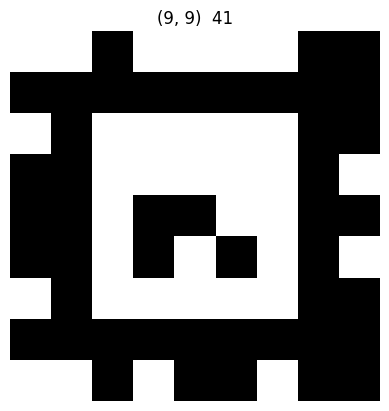

In [16]:
format = "tagStandard41h12"
tagnum = 0
tg = TagGenerator3(format)
im = tg.generate(tagnum)
print(f"Max tags: {len(tg.codes)}")
plt.imshow(im, cmap="gray")
plt.title(f"{im.shape}  {tg.template.numBits}")
plt.axis("off");

Write the individual tag to a png file.

In [30]:
png = tg.toRGBA(im)
outputdir = os.path.join("_images", format)
if not os.path.exists(outputdir):
    os.mkdir(outputdir)
outputfile = os.path.join(outputdir, str(tagnum) + ".png")
cv2.imwrite(outputfile, png)

True

In [ ]:
papersize = [8.5, 11]
tagcount = [4, 4]
dpi = 300